# Robustness of Graph Neural Networks at Scale - Quick Start

This notebook can be run in google colab and serves as a quick introduction to the [Robustness of Graph Neural Networks at Scale](https://github.com/sigeisler/robustness_of_gnns_at_scale) repository.

## 0. Setup

First, let's get the code and install requirements.


In [1]:
import config
%cd {config.PROJECT_DIR}

E:\Masterarbeit\ProjectCombined


E:\Anaconda\envs\Masterarbeit\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Imports

In [2]:
# run
import seml

In [2]:
#7 run
#%cd robustness_of_gnns_at_scale
from matplotlib import pyplot as plt

from experiments import (
    experiment_train,
    experiment_local_attack_direct,
    experiment_global_attack_direct
)

%matplotlib inline

%load_ext autoreload
%autoreload 2

Use from seml.experiment import setup_logger instead.
Note that seml.experiment.Experiment already includes the logger setup.
See https://github.com/TUM-DAML/seml/blob/master/examples/example_experiment.py


[02/20/25 14:29:00] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=573291;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=175991;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

[02/20/25 14:29:01] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=403591;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=160570;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

## 1. Training

For the training and evaluation code we decided to provide Sacred experiments which make it very easy to run the same code from the command line or on your cluster. To train or attack the models you can use the `script_execute_experiment` script and simply specify the respective configuration or execute the experiment directly by passing the desired configuration in [experiments/experiment_train.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_train.py#L74).

In the example below, we train a `GCN` on `Cora ML`.

[02/20/25 14:29:05] INFO     {'dataset': 'cora_ml', 'model_params': {'label': 'Vanilla      ]8;id=325622;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=295231;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#140\140]8;;\
                             GCN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters':                         
                             64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params':                             
                             None, 'gdc_params': {'alpha': 0.15, 'k': 64}}, 'train_params':                        
                             {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300,                                  
                             'max_epochs': 3000}, 'binary_attr': False, 'make_undirected':                         
                             True, 'seed': 0, 'artifact_dir': 'cache',                                             
                             'model_storage_type': 'demo', 'ppr_cache_params': {},                                 
                             'device': 'cpu', 'display_steps': 100, 'data_device': 'cpu'}                          

                    INFO     Training set size: 140                                         ]8;id=550618;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=750863;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#161\161]8;;\

                    INFO     Validation set size: 140                                       ]8;id=281248;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=265155;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#162\162]8;;\

                    INFO     Test set size: 2530                                            ]8;id=799787;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=475814;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#163\163]8;;\

[02/20/25 14:29:06] INFO     Memory Usage after loading the dataset:                        ]8;id=580555;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=105566;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#183\183]8;;\

                    INFO     nan                                                            ]8;id=715908;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=234171;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#184\184]8;;\

E:\Masterarbeit\ProjectCombined\rgnn_at_scale\models\gcn.py:315: UserWarning: torch.sparse.SparseTensor(indices, values, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:634.)
  adj = get_ppr_matrix(torch.sparse.FloatTensor(edge_idx, edge_weight), **self.gdc_params)
E:\Anaconda\envs\Masterarbeit\Lib\site-packages\torch_sparse\tensor.py:574: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse_csr_tensor(rowptr, col, value, self.sizes())


                    INFO                                                                                ]8;id=724611;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=992220;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch    0: loss_train: 1.94657, loss_val: 1.94478, acc_train: 0.10000,               
                             acc_val: 0.18571                                                                      

[02/20/25 14:29:08] INFO                                                                                ]8;id=454792;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=369558;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  100: loss_train: 0.09275, loss_val: 0.42175, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[02/20/25 14:29:11] INFO                                                                                ]8;id=931197;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=813905;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  200: loss_train: 0.07186, loss_val: 0.37577, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[02/20/25 14:29:13] INFO                                                                                ]8;id=538392;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=402394;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  300: loss_train: 0.07155, loss_val: 0.39984, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[02/20/25 14:29:15] INFO                                                                                ]8;id=620548;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=30078;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  400: loss_train: 0.06852, loss_val: 0.38230, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[02/20/25 14:29:18] INFO                                                                                ]8;id=642206;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=234330;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  500: loss_train: 0.06982, loss_val: 0.36410, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[02/20/25 14:29:20] INFO                                                                                ]8;id=483102;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=497814;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  600: loss_train: 0.06437, loss_val: 0.40359, acc_train: 1.00000,               
                             acc_val: 0.87857                                                                      

[02/20/25 14:29:22] INFO     Test accuracy is 0.8351778388023376 with seed 0                ]8;id=284587;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=645148;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#216\216]8;;\

                    INFO     Lock 1927659536720 acquired on cache\demo.json.lock                    ]8;id=453159;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=435969;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1927659536720 released on cache\demo.json.lock                    ]8;id=359658;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=160796;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#318\318]8;;\

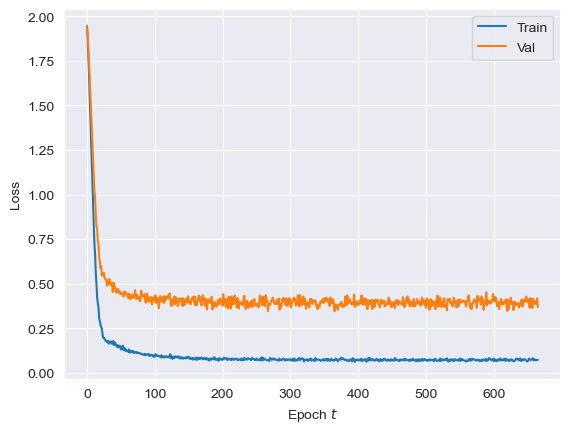

In [3]:
train_statistics = experiment_train.run(
    data_dir = './data',
    dataset = 'cora_ml',
    model_params = dict(
        label="Vanilla GCN",
        model="GCN",
        do_cache_adj_prep=True,
        n_filters=64,
        dropout=0.5,
        svd_params=None,
        jaccard_params=None,
        gdc_params={"alpha": 0.15, "k": 64}),
    train_params = dict(
        lr=1e-2,
        weight_decay=1e-3,
        patience=300,
        max_epochs=3000),
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    model_storage_type = 'demo',
    ppr_cache_params = dict(),
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    display_steps = 100,
    debug_level = "info"
)

# plot train and val loss curves
fig, ax = plt.subplots()

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax.set_xlabel('Epoch $t$')
ax.set_ylabel("Loss")
ax.plot(train_statistics['trace_train'], color=color, label='Train')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
ax.plot(train_statistics['trace_val'], color=color, label='Val')
ax.legend()

plt.show()

In [4]:
clean_acc = train_statistics["accuracy"]
print(f'Accuracy of the model: {100*clean_acc:.2f}%')

Accuracy of the model: 83.52%


## 1.1 Certificate integration

In [ ]:
#TODO
'''We need the following variables:
chosen model: GCN(
                    (conv1): SparseGCNConv(2879, 64)
                    (conv2): GCNConv(64, 7)
)
graph: for 
    edge_idx
    attr_idx
    n
    d
    nc
a dict containing:
    conv1.bias 
    conv2.bias
    conv1.lin.weight
    conv2.lin.weight

'''
 

In [5]:
# certificate integration
import torch
import numpy as np
import copy
from sparse_smoothing.models import GCN
from sparse_smoothing.utils import load_and_standardize

loaded_from_robustness = torch.load(f'cache/demo/demo_1.pt', map_location='cpu', weights_only=False)

trained_state_dict = copy.deepcopy(loaded_from_robustness)

for key in list(trained_state_dict.keys()):
    if 'layers.0.' in key:
        new_key = key.replace('layers.0.gcn_0', 'conv1')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

for key in list(trained_state_dict.keys()):
    if 'layers.1.' in key:
        new_key = key.replace('layers.1.gcn_1', 'conv2')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

In [6]:
graph = load_and_standardize('data/cora_ml.npz')
n, d = graph.attr_matrix.shape
nc = graph.labels.max() + 1
pf_plus_att = 0.01
pf_minus_att = 0.6

In [7]:
model = GCN(n_features=d, n_classes=nc, n_hidden=64)#.cuda()
# Load the modified state dictionary
model.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [21]:
print(model)
print(model.conv1.lin.weight)
print(model.conv2)



GCN(
  (conv1): SparseGCNConv(2879, 64)
  (conv2): GCNConv(64, 7)
)
Parameter containing:
tensor([[-0.0027, -0.0180, -0.0029,  ..., -0.0004, -0.0104, -0.0375],
        [-0.0074, -0.0102,  0.0018,  ..., -0.0066,  0.0135, -0.0341],
        [-0.0053, -0.0259, -0.0032,  ..., -0.0038, -0.0104, -0.0140],
        ...,
        [-0.0095, -0.0416,  0.0013,  ..., -0.0073, -0.0054, -0.0214],
        [ 0.0120,  0.0191,  0.0013,  ...,  0.0033,  0.0030, -0.0282],
        [ 0.0101, -0.0143, -0.0029,  ...,  0.0035,  0.0083,  0.0320]],
       requires_grad=True)
GCNConv(64, 7)


In [8]:
edge_idx = torch.LongTensor(np.stack(graph.adj_matrix.nonzero()))#.cuda()
attr_idx = torch.LongTensor(np.stack(graph.attr_matrix.nonzero()))#.cuda()

In [22]:
from sparse_smoothing.prediction import predict_smooth_gnn
#n_samples_eval = 100_000
#n_samples_eval = 10_000
n_samples_eval = 100

sample_config = {
    'n_samples': n_samples_eval,
    'pf_plus_adj': 0,
    'pf_minus_adj': 0,
    'pf_plus_att': 0.01,
    'pf_minus_att': 0.6,
}
batch_size = 50

sample_config_pre_eval = sample_config.copy()
sample_config_pre_eval['n_samples'] = 1_000


import torch


# we a small number of samples to estimate the majority class
pre_votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                               sample_config=sample_config_pre_eval,
                               model=model, n=n, d=d, nc=nc,
                               batch_size=batch_size)

# we use a larger number of samples to estimate a lower bound
# on the probability of observing the majority class
votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                           sample_config=sample_config,
                           model=model, n=n, d=d, nc=nc,
                           batch_size=batch_size)

print(votes)


[[ 99   0   0 ...   0   0   1]
 [  0 100   0 ...   0   0   0]
 [  0  97   0 ...   0   3   0]
 ...
 [ 85   0   0 ...  12   3   0]
 [  0   0   0 ...   0   0 100]
 [  0  23   1 ...  14   4  53]]


In [ ]:
from sparse_smoothing.cert import p_lower_from_votes, binary_certificate_grid


conf_alpha = 0.01

# compute the lower bound on the probability of the majority class
p_lower = p_lower_from_votes(votes=votes, pre_votes=pre_votes, alpha=conf_alpha, n_samples=n_samples_eval)

# compute the binary-class certificate 2D grid (for all pairs of ra and rd radii)
# where grid_binary_class > 0.5 means the instance is robust
grid_binary_class, *_ = binary_certificate_grid(pf_plus=pf_plus_att, pf_minus=pf_minus_att,
                                            p_emps=p_lower, reverse=False, progress_bar=True)

In [14]:
from sparse_smoothing.cert import regions_discrete, compute_rho_for_many
# if pf_plus = pf_minus any combination of ra+rd+rc=r gives the same result.
pf_plus = pf_minus = 0.8
ra = 1
rd = 0
rc = 0

n_discrete_categories = 2

regions = regions_discrete(ra=ra, rd=rd, rc=rc, k=n_discrete_categories, pf_plus=pf_plus, pf_minus=pf_minus)

percent_robust = (compute_rho_for_many(regions=regions, p_emps=p_lower)>0.5).mean() * 100

print(f'At radius r={ra+rd+rc}, {percent_robust} percent of nodes are certifiably robust')

At radius r=1, 62.45551601423488 percent of nodes are certifiably robust


## 2. Evaluation

For evaluation, we use the locally stored models. Similarly to training, we provide a script that runs the attacks for different seeds for all pretrained models. For all experiments, please check out the [config](https://github.com/sigeisler/robustness_of_gnns_at_scale/tree/main/config) folder.

### 2.1 Local PR-BCD Attack
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [7]:
local_prbcd_statistics = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 10_000,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info"
)

[02/07/25 14:01:20] INFO     {'dataset': 'cora_ml', 'attack': 'LocalPRBCD', 'attack_params':           ]8;id=847962;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=193471;file:///content/robustness_of_gnns_at_scale/experiments/common.py#38\38]8;;\
                             {'ppr_cache_params': {'data_artifact_dir': 'cache', 'data_storage_type':              
                             'ppr'}, 'epochs': 50, 'fine_tune_epochs': 100, 'search_space_size':                   
                             10000, 'ppr_recalc_at_end': True, 'loss_type': 'Margin', 'lr_factor':                 
                             0.05}, 'epsilons': [1], 'make_undirected': True, 'binary_attr': False,                
                             'seed': 0, 'artifact_dir': 'cache', 'pert_adj_storage_type': None,                    
                             'pert_attr_storage_type': None, 'model_label': 'Vanilla GCN',                         
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

/content/robustness_of_gnns_at_scale/rgnn_at_scale/helper/io.py:255: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  document['artifact'] = torch.load(self._build_artifact_pat

                    INFO     Found 1 models with label 'Vanilla GCN' to       ]8;id=27510;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=325230;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#141\141]8;;\
                             attack.                                                                               

[02/07/25 14:01:22] INFO     Sample Attack Nodes for model with accuracy 0.8344                       ]8;id=991395;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=817082;file:///content/robustness_of_gnns_at_scale/experiments/common.py#166\166]8;;\

                    INFO     Found 2530 suitable '1+ degree' nodes out of 2530 candidate nodes to be  ]8;id=328587;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=650851;file:///content/robustness_of_gnns_at_scale/experiments/common.py#132\132]8;;\
                             sampled from for the attack of which 2111 have the correct class label                

                    INFO     Sample the following attack nodes:                                       ]8;id=196731;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=126342;file:///content/robustness_of_gnns_at_scale/experiments/common.py#171\171]8;;\
                             [475]                                                                                 
                             [2105]                                                                                
                             [2754 2487]                                                                           

[02/07/25 14:01:23] INFO     Original: Loss: -9.870943069458008 Statstics: {'logit_target':       ]8;id=617839;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=837312;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#74\74]8;;\
                             -0.0002649671514518559, 'logit_best_non_target': -9.871208190917969,                  
                             'confidence_target': 0.9997350679492436, 'confidence_non_target':                     
                             5.164029956801338e-05, 'margin': 0.9996834276496755}                                  
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[02/07/25 14:01:31] INFO     Initial: Loss: -9.870943069458008 Statstics: {'logit_target':        ]8;id=74891;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=491136;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#92\92]8;;\
                             -0.0002649671514518559, 'logit_best_non_target': -9.871208190917969,                  
                             'confidence_target': 0.9997350679492436, 'confidence_non_target':                     
                             5.164029956801338e-05, 'margin': 0.9996834276496755}                                  
                                                                                                                   

[02/07/25 14:01:41] INFO                                                                         ]8;id=798748;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=64583;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 0 Loss: -9.870943069458008 Statstics: {'logit_target':                         
                             -0.0002775999018922448, 'logit_best_non_target':                                      
                             -9.823918342590332, 'confidence_target': 0.9997224386253953,                          
                             'confidence_non_target': 5.414102494420846e-05, 'margin':                             
                             0.9996682976004512}                                                                   
                                                                                                                   

                    INFO     Gradient mean 0.3825215697288513 std 0.19061188399791718 with base  ]8;id=337876;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=710094;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             learning rate 0.1                                                                     

 40%|████      | 20/50 [05:29<08:08, 16.28s/it]

[02/07/25 14:07:08] INFO                                                                         ]8;id=531314;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=506899;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 20 Loss: 2.1869754791259766 Statstics: {'logit_target':                        
                             -2.341095447540283, 'logit_best_non_target': -0.147914856672287,                      
                             'confidence_target': 0.0962221741318723, 'confidence_non_target':                     
                             0.8625045483232318, 'margin': -0.7662823741913595}                                    
                                                                                                                   

                    INFO     Gradient mean 0.257382333278656 std 0.16019366681575775 with base   ]8;id=119429;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=73754;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             learning rate 0.1                                                                     

 80%|████████  | 40/50 [10:53<02:42, 16.27s/it]

[02/07/25 14:12:33] INFO                                                                         ]8;id=778359;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=412885;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 40 Loss: 2.2191414833068848 Statstics: {'logit_target':                        
                             -2.3646514415740967, 'logit_best_non_target': -0.1434447169303894,                    
                             'confidence_target': 0.09398205289648356, 'confidence_non_target':                    
                             0.8663686943842035, 'margin': -0.77238664148772}                                      
                                                                                                                   

                    INFO     Gradient mean 0.24854663014411926 std 0.16704414784908295 with base ]8;id=324658;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=534918;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             learning rate 0.1                                                                     

100%|██████████| 50/50 [13:35<00:00, 16.32s/it]


[02/07/25 14:15:25] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=170266;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=964879;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 475 and budget 2:                                           

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=372165;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=611577;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 2, 'degree': 2, 'logits':                                          
                             [[-0.3801121711730957, -1.1652233600616455,                                           
                             2.004725933074951, -1.7374646663665771,                                               
                             -1.1058930158615112, 3.328197479248047,                                               
                             -1.1445794105529785]], 'initial_logits':                                              
                             [[-1.292714238166809, -2.1854071617126465,                                            
                             8.605257034301758, -1.3979883193969727,                                               
                             -1.2656865119934082, -1.2727556228637695,                                             
                             -1.3812861442565918]], 'larget': 2, 'node_id':                                        
                             475, 'perturbed_edges': [[475, 475], [1244,                                           
                             1590]], 'logit_target': -1.6097791194915771,                                          
                             'logit_best_non_target': -0.28630760312080383,                                        
                             'confidence_target': 0.19993177022940622,                                             
                             'confidence_non_target': 0.7510315607601477,                                          
                             'margin': -0.5510997905307414,                                                        
                             'initial_logit_target': -0.0002649671514518559,                                       
                             'initial_logit_best_non_target':                                                      
                             -9.871208190917969, 'initial_confidence_target':                                      
                             0.9997350679492436,                                                                   
                             'initial_confidence_non_target':                                                      
                             5.164029956801338e-05, 'initial_margin':                                              
                             0.9996834276496755}                                                                   

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=280304;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=560631;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 475                                        
                             and budget 2                                                                          

[02/07/25 14:15:26] INFO     Original: Loss: -0.23114874958992004 Statstics: {'logit_target':     ]8;id=214676;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=759916;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#74\74]8;;\
                             -1.4718097448349, 'logit_best_non_target': -1.7029584646224976,                       
                             'confidence_target': 0.2295097550237187, 'confidence_non_target':                     
                             0.18214385999184554, 'margin': 0.04736589503187316}                                   
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[02/07/25 14:15:28] INFO     Initial: Loss: -0.23114889860153198 Statstics: {'logit_target':      ]8;id=486645;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=629101;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#92\92]8;;\
                             -1.4718097448349, 'logit_best_non_target': -1.702958583831787,                        
                             'confidence_target': 0.2295097550237187, 'confidence_non_target':                     
                             0.1821438382786067, 'margin': 0.04736591674511201}                                    
                                                                                                                   

[02/07/25 14:15:31] INFO                                                                         ]8;id=196131;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=565719;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 0 Loss: -0.23114889860153198 Statstics: {'logit_target':                       
                             -1.6309723854064941, 'logit_best_non_target': -1.6188881397247314,                    
                             'confidence_target': 0.19573914766728745, 'confidence_non_target':                    
                             0.19811885715547972, 'margin': -0.002379709488192272}                                 
                                                                                                                   

                    INFO     Gradient mean 0.031648967415094376 std 0.033315639942884445 with    ]8;id=198994;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=451447;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             base learning rate 0.45                                                               

 40%|████      | 20/50 [01:40<02:36,  5.21s/it]

[02/07/25 14:17:11] INFO                                                                         ]8;id=766141;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=126930;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 20 Loss: 1.1745967864990234 Statstics: {'logit_target':                        
                             -2.319361448287964, 'logit_best_non_target': -1.129378318786621,                      
                             'confidence_target': 0.09833635841040556, 'confidence_non_target':                    
                             0.3232341425661681, 'margin': -0.22489778415576256}                                   
                                                                                                                   

                    INFO     Gradient mean 0.0049582417123019695 std 0.01810549758374691 with    ]8;id=458782;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=197302;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             base learning rate 0.45                                                               

 80%|████████  | 40/50 [03:19<00:48,  4.83s/it]

[02/07/25 14:18:50] INFO                                                                         ]8;id=379500;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=239215;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 40 Loss: 1.4026013612747192 Statstics: {'logit_target':                        
                             -2.441157579421997, 'logit_best_non_target': -1.038081407546997,                      
                             'confidence_target': 0.08706001422873832, 'confidence_non_target':                    
                             0.3541334683931123, 'margin': -0.267073454164374}                                     
                                                                                                                   

[02/07/25 14:18:51] INFO     Gradient mean 0.0057736970484256744 std 0.017709502950310707 with   ]8;id=845706;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=333315;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             base learning rate 0.45                                                               

100%|██████████| 50/50 [04:10<00:00,  5.01s/it]


[02/07/25 14:20:02] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=20735;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=194383;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 2105 and budget 9:                                          

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=208619;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=12632;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 9, 'degree': 9, 'logits':                                          
                             [[0.19890302419662476, 1.1940439939498901,                                            
                             -0.9670045375823975, -0.3006896376609802,                                             
                             -0.1330803632736206, 0.17006635665893555,                                             
                             -0.3634986877441406]], 'initial_logits':                                              
                             [[0.3648524582386017, 0.37913087010383606,                                            
                             -1.25045907497406, 0.6102796196937561,                                                
                             0.11482658982276917, 0.3414773941040039,                                              
                             -0.7681479454040527]], 'larget': 3, 'node_id':                                        
                             2105, 'perturbed_edges': [[2105, 2105, 2105,                                          
                             2105, 2105, 2105, 2105, 2105], [47, 1098, 1189,                                       
                             1386, 1554, 1886, 2200, 2312]], 'logit_target':                                       
                             -2.428565502166748, 'logit_best_non_target':                                          
                             -0.9338318109512329, 'confidence_target':                                             
                             0.08816321185168056, 'confidence_non_target':                                         
                             0.39304474801889616, 'margin':                                                        
                             -0.3048815361672156, 'initial_logit_target':                                          
                             -1.4718097448349,                                                                     
                             'initial_logit_best_non_target':                                                      
                             -1.7029584646224976,                                                                  
                             'initial_confidence_target': 0.2295097550237187,                                      
                             'initial_confidence_non_target':                                                      
                             0.18214385999184554, 'initial_margin':                                                
                             0.04736589503187316}                                                                  

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=905567;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=237362;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 2105                                       
                             and budget 9                                                                          

[02/07/25 14:20:03] INFO     Original: Loss: -0.518047571182251 Statstics: {'logit_target':       ]8;id=265680;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=509310;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#74\74]8;;\
                             -0.8667964339256287, 'logit_best_non_target': -1.3848440647125244,                    
                             'confidence_target': 0.42029584033058137, 'confidence_non_target':                    
                             0.25036283714895025, 'margin': 0.16993300318163113}                                   
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[02/07/25 14:20:05] INFO     Initial: Loss: -0.5180469751358032 Statstics: {'logit_target':       ]8;id=212287;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=434534;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#92\92]8;;\
                             -0.8667967319488525, 'logit_best_non_target': -1.3848437070846558,                    
                             'confidence_target': 0.42029571507267877, 'confidence_non_target':                    
                             0.2503629266856941, 'margin': 0.16993278838698467}                                    
                                                                                                                   

[02/07/25 14:20:07] INFO                                                                         ]8;id=406903;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=267419;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 0 Loss: -0.5180469751358032 Statstics: {'logit_target':                        
                             -1.2016123533248901, 'logit_best_non_target': -1.1677577495574951,                    
                             'confidence_target': 0.3007089717176309, 'confidence_non_target':                     
                             0.31106364247427365, 'margin': -0.010354670756642759}                                 
                                                                                                                   

                    INFO     Gradient mean 0.30327340960502625 std 0.12967035174369812 with base ]8;id=993035;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=529541;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             learning rate 0.05                                                                    

 40%|████      | 20/50 [01:38<02:27,  4.92s/it]

[02/07/25 14:21:47] INFO                                                                         ]8;id=329859;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=717959;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 20 Loss: 1.5722019672393799 Statstics: {'logit_target':                        
                             -2.175513982772827, 'logit_best_non_target': -0.5972084403038025,                     
                             'confidence_target': 0.11354977604075751, 'confidence_non_target':                    
                             0.5503458169205341, 'margin': -0.4367960408797766}                                    
                                                                                                                   

                    INFO     Gradient mean 0.07371141761541367 std 0.11345444619655609 with base ]8;id=73823;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=628651;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             learning rate 0.05                                                                    

 80%|████████  | 40/50 [03:18<00:49,  4.96s/it]

[02/07/25 14:23:25] INFO                                                                         ]8;id=566418;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=17355;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 40 Loss: 1.6536660194396973 Statstics: {'logit_target':                        
                             -2.221522569656372, 'logit_best_non_target': -0.564985454082489,                      
                             'confidence_target': 0.10844386971740279, 'confidence_non_target':                    
                             0.5683684141374798, 'margin': -0.4599245444200771}                                    
                                                                                                                   

                    INFO     Gradient mean 0.09050936251878738 std 0.11264076828956604 with base ]8;id=566368;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=489364;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             learning rate 0.05                                                                    

100%|██████████| 50/50 [04:09<00:00,  4.98s/it]


[02/07/25 14:24:31] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=249256;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=219674;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 2754 and budget 1:                                          

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=809761;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=919336;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 1, 'degree': 1, 'logits':                                          
                             [[-1.0587369203567505, 2.437216281890869,                                             
                             -1.1243767738342285, 0.7031921744346619,                                              
                             1.0129375457763672, -1.1822229623794556,                                              
                             -1.0024089813232422]], 'initial_logits':                                              
                             [[-1.3485153913497925, 1.256791353225708,                                             
                             -0.9322404861450195, 1.774838924407959,                                               
                             1.1852469444274902, -1.2754199504852295,                                              
                             -0.8708934783935547]], 'larget': 3, 'node_id':                                        
                             2754, 'perturbed_edges': [[2754], [2681]],                                            
                             'logit_target': -2.1624515056610107,                                                  
                             'logit_best_non_target': -0.428427517414093,                                          
                             'confidence_target': 0.11504274711303826,                                             
                             'confidence_non_target': 0.6515328136258707,                                          
                             'margin': -0.5364900665128324,                                                        
                             'initial_logit_target': -0.8667964339256287,                                          
                             'initial_logit_best_non_target':                                                      
                             -1.3848440647125244,                                                                  
                             'initial_confidence_target':                                                          
                             0.42029584033058137,                                                                  
                             'initial_confidence_non_target':                                                      
                             0.25036283714895025, 'initial_margin':                                                
                             0.16993300318163113}                                                                  

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=326744;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=2900;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 2754                                       
                             and budget 1                                                                          

[02/07/25 14:24:33] INFO     Original: Loss: -1.3192821741104126 Statstics: {'logit_target':      ]8;id=212234;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=256807;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#74\74]8;;\
                             -0.4825585186481476, 'logit_best_non_target': -1.8018406629562378,                    
                             'confidence_target': 0.6172022465164124, 'confidence_non_target':                     
                             0.16499490852923396, 'margin': 0.4522073379871785}                                    
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[02/07/25 14:24:35] INFO     Initial: Loss: -1.3192821741104126 Statstics: {'logit_target':       ]8;id=612444;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=835362;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#92\92]8;;\
                             -0.4825585186481476, 'logit_best_non_target': -1.8018406629562378,                    
                             'confidence_target': 0.6172022465164124, 'confidence_non_target':                     
                             0.16499490852923396, 'margin': 0.4522073379871785}                                    
                                                                                                                   

[02/07/25 14:24:38] INFO                                                                         ]8;id=555805;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=383947;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 0 Loss: -1.3192821741104126 Statstics: {'logit_target':                        
                             -0.55649334192276, 'logit_best_non_target': -1.7330806255340576,                      
                             'confidence_target': 0.573215614814274, 'confidence_non_target':                      
                             0.1767391034635659, 'margin': 0.39647651135070805}                                    
                                                                                                                   

                    INFO     Gradient mean 0.016696982085704803 std 0.023505378514528275 with    ]8;id=811140;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=746732;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             base learning rate 0.6000000000000001                                                 

 40%|████      | 20/50 [01:38<02:26,  4.89s/it]

[02/07/25 14:26:16] INFO                                                                         ]8;id=263795;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=195270;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 20 Loss: 0.18794190883636475 Statstics: {'logit_target':                       
                             -1.1734507083892822, 'logit_best_non_target': -0.9702954888343811,                    
                             'confidence_target': 0.30929780116375216, 'confidence_non_target':                    
                             0.3789710398462681, 'margin': -0.06967323868251596}                                   
                                                                                                                   

                    INFO     Gradient mean 0.007803549058735371 std 0.01584271714091301 with     ]8;id=438784;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=348974;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             base learning rate 0.6000000000000001                                                 

 80%|████████  | 40/50 [03:18<00:51,  5.13s/it]

[02/07/25 14:27:57] INFO                                                                         ]8;id=602137;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=55595;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#113\113]8;;\
                             Epoch: 40 Loss: 0.3676351308822632 Statstics: {'logit_target':                        
                             -1.2916975021362305, 'logit_best_non_target': -0.910591185092926,                     
                             'confidence_target': 0.27480390672134125, 'confidence_non_target':                    
                             0.40228632804005693, 'margin': -0.12748242131871568}                                  
                                                                                                                   

                    INFO     Gradient mean 0.009701507166028023 std 0.014036411419510841 with    ]8;id=53572;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py\local_prbcd.py]8;;\:]8;id=182544;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/local_prbcd.py#114\114]8;;\
                             base learning rate 0.6000000000000001                                                 

100%|██████████| 50/50 [04:10<00:00,  5.01s/it]


[02/07/25 14:29:04] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=837779;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=220353;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 2487 and budget 12:                                         

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=959847;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=180341;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 12, 'degree': 12, 'logits':                                        
                             [[0.5568550229072571, 0.5557218194007874,                                             
                             -0.9901720285415649, -0.5981150269508362,                                             
                             -0.4868677854537964, 1.1921076774597168,                                              
                             -0.43060100078582764]], 'initial_logits':                                             
                             [[-0.06012573093175888, 2.114328145980835,                                            
                             -1.3868383169174194, -0.3993767201900482,                                             
                             -0.5612420439720154, 0.7950459718704224,                                              
                             -0.7121751308441162]], 'larget': 1, 'node_id':                                        
                             2487, 'perturbed_edges': [[2487, 2487, 2487,                                          
                             2487, 2487, 2487, 2487, 2487, 2487, 2487], [689,                                      
                             1103, 1205, 1227, 1267, 1344, 1817, 2227, 2385,                                       
                             2551]], 'logit_target': -1.6379873752593994,                                          
                             'logit_best_non_target': -1.0016014575958252,                                         
                             'confidence_target': 0.19437084446032957,                                             
                             'confidence_non_target': 0.36729076933833193,                                         
                             'margin': -0.17291992487800237,                                                       
                             'initial_logit_target': -0.4825585186481476,                                          
                             'initial_logit_best_non_target':                                                      
                             -1.8018406629562378,                                                                  
                             'initial_confidence_target': 0.6172022465164124,                                      
                             'initial_confidence_non_target':                                                      
                             0.16499490852923396, 'initial_margin':                                                
                             0.4522073379871785}                                                                   

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=342570;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=606966;file:///content/robustness_of_gnns_at_scale/experiments/experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 2487                                       
                             and budget 12                                                                         

In [ ]:
n_change = 0
for node in local_prbcd_statistics['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio =  n_change / len(local_prbcd_statistics['results'])
print(f'Percentage of changed node predictions : {100*flipped_ratio:.2f}%')

Percentage of changed node predictions : 100.00%


### 2.2 Global PR-BCD Attack

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [ ]:
global_prbcd_statistics = experiment_global_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'PRBCD',
    attack_params = dict(
        epochs=500,
        fine_tune_epochs=100,
        keep_heuristic="WeightOnly",
        search_space_size=100_000,
        do_synchronize=True,
        loss_type="tanhMargin",
    ),
    epsilons = [0.25],
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    pert_adj_storage_type = 'evasion_global_adj',
    pert_attr_storage_type = 'evasion_global_attr',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info"
)

print(global_prbcd_statistics)

[01/08/25 19:24:03] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs':     ]8;id=259883;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=861888;file:///content/robustness_of_gnns_at_scale/experiments/common.py#38\38]8;;\
                             500, 'fine_tune_epochs': 100, 'keep_heuristic': 'WeightOnly',                         
                             'search_space_size': 100000, 'do_synchronize': True, 'loss_type':                     
                             'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,                           
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=814253;file:///content/robustness_of_gnns_at_scale/experiments/experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=973611;file:///content/robustness_of_gnns_at_scale/experiments/experiment_global_attack_direct.py#138\138]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=473231;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=263066;file:///content/robustness_of_gnns_at_scale/experiments/common.py#109\109]8;;\
                             Execute attack...                                                                     

[01/08/25 19:24:04] INFO                                                                                ]8;id=596351;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=610692;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#86\86]8;;\
                             Before the attack - Loss: -0.6511061787605286 Accuracy: 83.439 %                      
                                                                                                                   

  0%|          | 0/500 [00:00<?, ?it/s]

[01/08/25 19:24:13] INFO                                                                               ]8;id=323528;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=593423;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 0 Loss: -0.6510993242263794 Accuracy: 79.051 %                                 
                                                                                                                   

  4%|▍         | 20/500 [03:09<1:15:13,  9.40s/it]

[01/08/25 19:27:22] INFO                                                                               ]8;id=552333;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=42856;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 20 Loss: -0.24453163146972656 Accuracy: 60.672 %                               
                                                                                                                   

  8%|▊         | 40/500 [06:18<1:13:28,  9.58s/it]

[01/08/25 19:30:32] INFO                                                                               ]8;id=456101;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=611665;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 40 Loss: -0.16238142549991608 Accuracy: 56.957 %                               
                                                                                                                   

 12%|█▏        | 60/500 [09:25<1:09:53,  9.53s/it]

[01/08/25 19:33:39] INFO                                                                               ]8;id=987569;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=321940;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 60 Loss: -0.13186274468898773 Accuracy: 55.534 %                               
                                                                                                                   

 16%|█▌        | 80/500 [12:34<1:06:18,  9.47s/it]

[01/08/25 19:36:49] INFO                                                                               ]8;id=45116;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=232975;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 80 Loss: -0.11300715804100037 Accuracy: 54.506 %                               
                                                                                                                   

 20%|██        | 100/500 [15:45<1:02:48,  9.42s/it]

[01/08/25 19:39:59] INFO                                                                               ]8;id=46440;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=537010;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 100 Loss: -0.10065988451242447 Accuracy: 53.874 %                              
                                                                                                                   

 24%|██▍       | 120/500 [18:58<1:00:54,  9.62s/it]

[01/08/25 19:43:11] INFO                                                                               ]8;id=519570;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=301469;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 120 Loss: -0.08779348433017731 Accuracy: 53.123 %                              
                                                                                                                   

In [ ]:
perturbed_acc = global_prbcd_statistics["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack: {100*perturbed_acc:.2f}%')

Clean accuracy: 81.90%; Accuracy after global PRBCD attack: 52.25%
